#PERCEPTRON CIFAR10


In [0]:
%matplotlib inline

import torch
import torchvision
import numpy as np

np.seterr(all='raise')

{'divide': 'warn', 'invalid': 'warn', 'over': 'warn', 'under': 'ignore'}

In [0]:
# Carregar os datasets

dataset_train = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True)

dataset_test = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True)

0it [00:00, ?it/s]

 99%|█████████▉| 169385984/170498071 [00:34<00:00, 14333015.03it/s]

Files already downloaded and verified


In [0]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [0]:
print(len(dataset_train), len(dataset_test))

50000 10000


In [0]:
# Converter para tons de cinza

# Treino
grayscale_dataset_train = []
for img,label in dataset_train:
    category = classes[label]
    gray_npimg = np.array(img.convert('L'))
    grayscale_dataset_train.append((gray_npimg,category))
    
# Teste
grayscale_dataset_test = []
for img,label in dataset_test:
    category = classes[label]
    gray_npimg = np.array(img.convert('L'))
    grayscale_dataset_test.append((gray_npimg,category))    

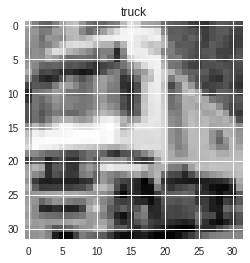

In [0]:
# Mostrar uma imagem

import matplotlib.pyplot as plt
import numpy as np

image_index = 1
label = grayscale_dataset_train[image_index][1]
npimg = grayscale_dataset_train[image_index][0]

plt.imshow(npimg, cmap='gray')
plt.title(label)
plt.show()

In [0]:
# Converter para vetores 1D

# Para pensar: por que a divisão por 255 no código abaixo?

linear_dataset_train = []
target_labels = ('plane', 'car', 'ship', 'truck')
for img,category in grayscale_dataset_train:
    linear_img = img.reshape(img.shape[0]*img.shape[1],1) / 255
    if category in target_labels:
        label = 1
    else:
        label = 0
    linear_dataset_train.append((linear_img,label))
    
linear_dataset_test = []
target_labels = ('plane', 'car', 'ship', 'truck')
for img,category in grayscale_dataset_test:
    linear_img = img.reshape(img.shape[0]*img.shape[1],1) / 255
    if category in target_labels:
        label = 1
    else:
        label = 0
    linear_dataset_test.append((linear_img,label))    

In [0]:
size = len(linear_dataset_train[0][0])
print(size)

1024


# Perceptron

In [0]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
  
def stepFunction(t):
  if t >= 0.5:
    return 1
  else:
    return 0

def perceptron(inputs, weights):
  value = np.dot(np.transpose(inputs), weights[:-1]) + weights[-1]
  return sigmoid(value)
  pass

In [0]:
def correct_weights(weights,inputs,neta,error):
  for i in range(len(weights)-1):
    weights[i] +=inputs[i][0]*neta*error
  weights[-1] +=error*neta
  return weights

In [0]:
def evaluate(weights,dataset):
  error = 0
   # Defina a métrica de avaliação do perceptron aqui (e.g. acurácia)
  for img,label in dataset:
    pred = perceptron(img,weights)
    if(stepFunction(pred)!=label):
      error+=1
  ev = (len(dataset)-error) /len(dataset)
  return ev

  pass

In [0]:
# Inicialização
weights = (np.random.rand(1,size) - 0.5)[0]
bias = (np.random.rand(1) - 0.5) 
weights = np.append(weights, bias) 
save_weights = []
bestEvaluation = 0
neta = 0.001
np.random.shuffle(linear_dataset_train)
  # Implemente o treino aqui (para separar as duas classes definidas)
accuracies = []
for epoch in range(100):
      
  acc = evaluate(weights,linear_dataset_train) 
  accuracies.append(acc)
  weights-=neta*acc
  print(epoch," ",acc)  
  
print("DONE")

    
        
    #pass

0   0.58982
1   0.59166
2   0.59324
3   0.59512
4   0.59634
5   0.59752
6   0.59784
7   0.59842
8   0.59872
9   0.59922
10   0.5993
11   0.59944
12   0.59964
13   0.59956
14   0.59952
15   0.59942
16   0.59968
17   0.59966
18   0.59974
19   0.59982
20   0.5998
21   0.59982
22   0.59984
23   0.59988
24   0.5999
25   0.59994
26   0.59994
27   0.59994
28   0.59998
29   0.6
30   0.59998
31   0.6
32   0.6
33   0.60002
34   0.60002
35   0.60002
36   0.60002
37   0.60002
38   0.6
39   0.6
40   0.6
41   0.6
42   0.6
43   0.6
44   0.6
45   0.6
46   0.6
47   0.6
48   0.6
49   0.6
50   0.6
51   0.6
52   0.6
53   0.6
54   0.6
55   0.6
56   0.6
57   0.6
58   0.6
59   0.6
60   0.6
61   0.6
62   0.6
63   0.6
64   0.6
65   0.6
66   0.6
67   0.6
68   0.6
69   0.6
70   0.6
71   0.6
72   0.6
73   0.6
74   0.6
75   0.6
76   0.6
77   0.6
78   0.6
79   0.6
80   0.6
81   0.6
82   0.6
83   0.6
84   0.6
85   0.6
86   0.6
87   0.6
88   0.6
89   0.6
90   0.6
91   0.6
92   0.6
93   0.6
94   0.6
95   0.6
96   0.6


In [0]:
# Avalie o modelo treinado aqui
# Como a acurácia no conjunto de teste se compara com a acurácia obtida no conjunto de treino?
 #list(map(lambda x: x**2, items))
#preds = perceptron()

acc = evaluate(weights,linear_dataset_test)
print("acc = ",acc)


acc =  0.6


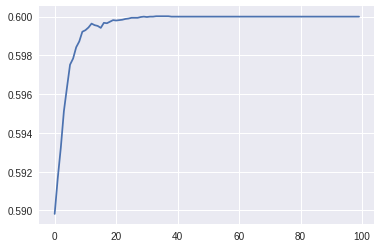

In [0]:
# Caso queiram plotar alguma coisa

import matplotlib.pyplot as plt
plt.plot(accuracies)

# Classificando classes individuais

In [0]:
def data(target_labels,grayscale_dataset_train,grayscale_dataset_test):
  linear_dataset_train = []
  linear_dataset_test = []
  for img,category in grayscale_dataset_train:
    linear_img = img.reshape(img.shape[0]*img.shape[1],1) / 255
    if category in target_labels:
        label = 1
    else:
        label = 0
    linear_dataset_train.append((linear_img,label))
    
  for img,category in grayscale_dataset_test:
    linear_img = img.reshape(img.shape[0]*img.shape[1],1) / 255
    if category in target_labels:
        label = 1
    else:
        label = 0
    linear_dataset_test.append((linear_img,label))
  return linear_dataset_train,linear_dataset_test


#DATASETS

In [0]:
def training(linear_dataset_train,label_set):
  weights = (np.random.rand(1,size) - 0.5)[0]
  bias = (np.random.rand(1) - 0.5) 
  weights = np.append(weights, bias) 
  save_weights = []
  bestEvaluation = 0
  neta = 0.001
  np.random.shuffle(linear_dataset_train)
  # Implemente o treino aqui (para separar as duas classes definidas)
  accuracies = []
  for epoch in range(100): 
 
    acc = evaluate(weights,linear_dataset_train) 
    accuracies.append(acc)
    weights-=neta*acc
    if(acc>bestEvaluation):
      bestEvaluation = acc
      best_weights = weights
  print(label_set," ",bestEvaluation)  
  
  print("DONE")
  return best_weights

In [0]:
plane_dataset_train,plane_dataset_test = data(["plane"],grayscale_dataset_train,grayscale_dataset_test)
car_dataset_train,car_dataset_test = data(["car"],grayscale_dataset_train,grayscale_dataset_test)
bird_dataset_train,bird_dataset_test = data(["bird"],grayscale_dataset_train,grayscale_dataset_test)
cat_dataset_train,cat_dataset_test = data(["cat"],grayscale_dataset_train,grayscale_dataset_test)
deer_dataset_train,deer_dataset_test = data(["deer"],grayscale_dataset_train,grayscale_dataset_test)
dog_dataset_train,dog_dataset_test = data(["dog"],grayscale_dataset_train,grayscale_dataset_test)
frog_dataset_train,frog_dataset_test = data(["frog"],grayscale_dataset_train,grayscale_dataset_test)
horse_dataset_train,horse_dataset_test = data(["horse"],grayscale_dataset_train,grayscale_dataset_test)
ship_dataset_train,ship_dataset_test = data(["ship"],grayscale_dataset_train,grayscale_dataset_test)
truck_dataset_train,truck_dataset_test = data(["truck"],grayscale_dataset_train,grayscale_dataset_test)
print("DONE DATASETS")


DONE DATASETS


#TREINO

In [37]:

plane_weights = training(plane_dataset_train,"plane")
car_weights = training(car_dataset_train,"car")
bird_weights = training(bird_dataset_train,"bird")
cat_weights = training(cat_dataset_train,"cat")
deer_weights = training(deer_dataset_train,"deer")
dog_weights = training(dog_dataset_train,"dog")
frog_weights = training(frog_dataset_train,"frog")
horse_weights = training(horse_dataset_train,"horse")
ship_weights = training(ship_dataset_train,"ship")
truck_weights = training(truck_dataset_train,"truck")
print("DONE TRAINING")


plane   0.9
DONE
car   0.9
DONE
bird   0.9
DONE
cat   0.9
DONE
deer   0.9
DONE
dog   0.90002
DONE
frog   0.9
DONE
horse   0.9
DONE
ship   0.9
DONE
truck   0.9
DONE
DONE TRAINING


#AVALIANDO PERCEPTRONS

In [38]:
print("plane acc = ",evaluate(plane_weights,plane_dataset_test))
print("car acc = ",evaluate(car_weights,car_dataset_test))
print("bird acc = ",evaluate(bird_weights,bird_dataset_test))
print("cat acc = ",evaluate(cat_weights,cat_dataset_test))
print("deer acc = ",evaluate(deer_weights,deer_dataset_test))
print("dog acc = ",evaluate(dog_weights,dog_dataset_test))
print("frog acc = ",evaluate(frog_weights,frog_dataset_test))
print("horse acc = ",evaluate(horse_weights,horse_dataset_test))
print("ship acc = ",evaluate(ship_weights,ship_dataset_test))
print("truck acc = ",evaluate(truck_weights,truck_dataset_test))








plane acc =  0.9
car acc =  0.9
bird acc =  0.9
cat acc =  0.9
deer acc =  0.9
dog acc =  0.9
frog acc =  0.9
horse acc =  0.9
ship acc =  0.9
truck acc =  0.9


In [0]:
weights_all =[
    plane_weights,
    car_weights,
    bird_weights,
    cat_weights,
    deer_weights,
    dog_weights,
    frog_weights,
    horse_weights,
    ship_weights,
    truck_weights]


#TESTANDO OS PERCEPTRONS




---




In [0]:
def softmax(L):
    expL = np.exp(L)
    sumExpL = sum(expL)
    result = []
    for i in expL:
        result.append(i*1.0/sumExpL)
    return result

In [41]:
print(sum(softmax([0.1,0.3,0.9])))

1.0


cat


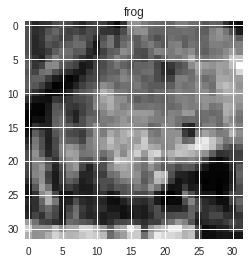

In [42]:
import matplotlib.pyplot as plt


classes = ['plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
index =107
img = grayscale_dataset_test[index][0]
category =  grayscale_dataset_test[index][1]
linear_img = img.reshape(img.shape[0]*img.shape[1],1) / 255
    
preds = []
for i in range(len(weights_all)):
  pred = perceptron(linear_img,weights_all[i])
  preds.append(pred[0])


preds = softmax(preds)
print(classes[preds.index(max(preds))])
plt.imshow(img, cmap='gray')
plt.title(category)
plt.show()



In [43]:
wrong = 0
for img,category in grayscale_dataset_test:
  linear_img = img.reshape(img.shape[0]*img.shape[1],1) / 255
  preds = []
  for i in range(len(weights_all)):
    pred = perceptron(linear_img,weights_all[i])
    preds.append(pred[0])
    
  preds = softmax(preds)  
  if category not in classes[preds.index(max(preds))]:
    wrong+=1

acc = (len(grayscale_dataset_test) -wrong)/len(grayscale_dataset_test) 
print("acuracia = ",acc)

acuracia =  0.1218
